In [1]:
import serial
import csv
import time
import datetime
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np



6.1835784912,6.1835784912,10.3912086487,0.1222495139
-4.7159881592,-4.7159881592,10.3894834518,0.1194193512
8.3573455811,8.3573455811,10.3923969269,0.1167685017
-4.5686035156,-4.5686035156,10.3901948929,0.1141779646
9.2108764648,9.2108764648,10.3949060440,0.1117731854
-0.2087860107,-0.2087860107,10.3958339691,0.1094298288
3.4018859863,3.4018859863,10.4006471634,0.1072231680
2.6220245361,2.6220245361,10.4019556046,0.1050702557
-2.8246765137,-2.8246765137,10.4024400711,0.1029944569
1.2833709717,1.2833709717,10.4034652710,0.1010045186
-14.6576080322,-14.6576080322,10.3970584869,0.0990196019
7.9520568848,7.9520568848,10.4007492065,0.0972032622
0.9456481934,0.9456481934,10.3997459412,0.0954105109
3.2667846680,3.2667846680,10.4009475708,0.0937022269
1.7316436768,1.7316436768,10.4042015076,0.0920725763
-0.6324920654,-0.6324920654,10.4025421143,0.0904568881
486.8385925293,486.8385925293,8.1697893143,0.0698272586
510.8667602539,510.8667602539,8.4358339310,0.0708893612
445.7702941895,445.7702941

ValueError: could not convert string to float: 'ovf'

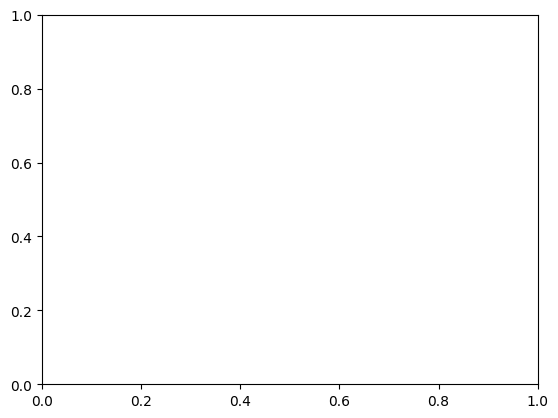

In [11]:
# Open the serial port (change the port and baud rate as needed)
ser = serial.Serial('/dev/cu.usbmodem1301', 9600)
# Read and plot the data in real time
with open('data.csv','w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Timestamp', 'Volume Flow', 'Mass Flow', 'Average Flow', 'Totalizer']) 
    
    # Create the figure and subplot for the plot
    fig, ax = plt.subplots()
    
    # Set the x-axis limits and labels
    ax.set_xlim(0, 60) # Show the last 60 seconds of data
    ax.set_xlabel('Time (s)')
    
    # Set the y-axis limits and labels
    ax.set_ylim(0, 10) # Change the limits as needed
    ax.set_ylabel('Flow')
    
    # Create empty lists to store the data
    times = []
    volume_flows = []
    mass_flows = []
    average_flows = []
    totalizers = []
    initial_time = time.time()
    while True:
        try:
            # clear_output(wait=True)
            # Read a line of data from the serial port
            serial_line = ser.readline().strip().decode('utf-8')
            reception_time = time.time() - initial_time
            print(serial_line)
            # Split the line into four values
            values = serial_line.split(',')
            if len(values) == 4:
                # Get the current timestamp and save the values to the CSV file
                writer.writerow([reception_time, values[0], values[1], values[2], values[3]])
        
                # Convert the values to floats and add them to the lists
                #times.append(reception_time)
                #volume_flows.append(float(values[0]))
                #mass_flows.append(float(values[1]))
                #average_flows.append(float(values[2]))
                #totalizers.append(float(values[3]))
                
                # Update the plot with the new data
                ax.clear()
                #ax.set_xlim(max(0, reception_time-60), reception_time)
                #ax.plot(times, volume_flows, label='Volume Flow')
                #ax.plot(times, mass_flows, label='Mass Flow')
                #ax.plot(times, average_flows, label='Average Flow')
                #ax.plot(times, totalizers, label='Totalizer')
                #ax.legend()
                #plt.pause(0.001)

        # Close the CSV file and serial port when finished
        except KeyboardInterrupt:
            file.close()
            ser.close()